* [Хабр](https://amit-kumar-manjhi.medium.com/import-data-from-excel-into-mysql-using-python-c80c2bd8676a)<br>
* [Проглиб](https://proglib.io/p/naibolee-polnyy-gayd-po-rabote-s-sql-v-data-science-2019-10-14)<br>
* [Подробно](https://proselyte.net/tutorials/sql/introduction/)<br>
* [Видео](https://www.youtube.com/watch?v=TCdyfEvrIUg)<br>
* [Кодинг](https://coderlessons.com/tutorials/bazy-dannykh/uchebnik-sqlite/3-baza-dannykh-sqlite)<br>

In [ ]:
r'C:\Users\Mr Alex\Downloads\Chinook_Sqlite.sqlite'

In [ ]:
#Открываем, выбираем ряды
select * from recent_grads limit 5;

#Порядок исполнения команд
SELECT column(s)
  FROM some_table
 WHERE some_condition
 GROUP BY column(s)
HAVING some_condition
 ORDER BY column(s)
 LIMIT some_limit;

In [ ]:
#Выбираем колонки
select Major, Major_category from recent_grads;

In [ ]:
#Ограничиваем по доп параметрам
SELECT Major, Major_category, ShareWomen, Unemployment_rate
  FROM recent_grads
 WHERE (Major_category = 'Engineering') 
   AND (ShareWomen > 0.5 OR Unemployment_rate < 0.051);
 ORDER BY Unemployment_rate DESC; #Отсортированы по убыванию

SELECT Major_category, Major
  FROM recent_grads
 WHERE Major_category IN ('Business', 'Humanities & Liberal Arts', 'Education');

SELECT Major_category, Major
  FROM recent_grads
 WHERE Major_category IN (SELECT Major_category
                            FROM recent_grads
                           GROUP BY Major_category
                           ORDER BY SUM(TOTAL) DESC
                           LIMIT 3
                         );

SELECT Major, Major_category, 
       CAST(Sample_size AS FLOAT)/Total AS ratio 
  FROM recent_grads 
 WHERE ratio > (SELECT AVG(CAST(Sample_size AS FLOAT)/Total) AS avg_ratio 
                  FROM recent_grads
               );

In [ ]:
#Математические операции с данными
SELECT MIN(Unemployment_rate)
   
SELECT SUM(Total)

SELECT COUNT(*), COUNT(Unemployment_rate) #проверяют где есть пустые ячейки NULL

SELECT AVG(Total), MIN(Men), MAX(Women) #Разные операции с колонками

SELECT ROUND(AVG(College_jobs) / AVG(Total), 3) AS Share_degree_jobs #Делим и округляем, три знака после точки
  
SELECT COUNT(*) 'Number of Majors',
       MAX(Unemployment_rate) 'Highest Unemployment Rate' #присваиваем заголовки к выведенным результатам

SELECT COUNT(DISTINCT Major_category) #Считает уникальные значения

SELECT 'Major: ' || LOWER(Major) AS Major, #Объединяет строки
       Total, Men, Women, Unemployment_rate,
       LENGTH(Major) AS Length_of_name #Присваивает колонке результата заголовок
        
SELECT Major, Major_category, (P75th - P25th) AS quartile_spread #Вычитание

SELECT Major, Unemployment_rate
  FROM recent_grads
 WHERE Unemployment_rate < (SELECT AVG(Unemployment_rate) #Правильный способ сравнения внутри кода
                              FROM recent_grads
                           );

SELECT CAST(COUNT(*) as FLOAT)/(SELECT COUNT(*)
                                  FROM recent_grads
                               ) AS proportion_abv_avg
  FROM recent_grads
 WHERE ShareWomen > (SELECT AVG(ShareWomen)
                       FROM recent_grads
                    );

In [ ]:
#Создаем правило - находим совпадение случаев CASE END
SELECT CASE
       WHEN Sample_size < 200 THEN 'Small'
       WHEN Sample_size < 1000 THEN 'Medium'
       ELSE 'Large'
       END AS Sample_category
 
SELECT Major_category, SUM(Total) AS Total_graduates
  FROM recent_grads
 GROUP BY Major_category; #Объединяет одинаковые имена в группы

SELECT Major_category, Sample_category,
       AVG(ShareWomen) AS Mean_women,
       SUM(Total) AS Total_graduates
  FROM new_grads
 GROUP BY Major_category, Sample_category; #Группировать можно по нескольким параметрам
HAVING Mean_women > 0.8; #Это ограничивающий параметр 
    
    

In [ ]:
%%capture
%load_ext sql
%sql sqlite:///factbook.db

In [ ]:
%%sql
SELECT *
  FROM facts
 LIMIT 5;

In [ ]:
%%sql
SELECT MIN(population) AS min_pop,
       MAX(population) AS max_pop,
       MIN(population_growth) AS min_pop_growth,
       MAX(population_growth) max_pop_growth 
  FROM facts;

In [ ]:
%%sql
SELECT *
  FROM facts
 WHERE population == (SELECT MIN(population)
                        FROM facts
                     );

In [ ]:
%%sql
SELECT *
  FROM facts
 WHERE population == (SELECT MAX(population)
                        FROM facts
                     );

In [ ]:
%%sql
SELECT MIN(population) AS min_pop,
       MAX(population) AS max_pop,
       MIN(population_growth) AS min_pop_growth,
       MAX(population_growth) AS max_pop_growth 
  FROM facts
 WHERE name <> 'World';

In [ ]:
%%sql
SELECT AVG(population) AS avg_population, AVG(area) AS avg_area
  FROM facts
 WHERE name <> 'World';

In [ ]:
%%sql
SELECT *
  FROM facts
 WHERE population > (SELECT AVG(population)
                       FROM facts
                      WHERE name <> 'World'
                    )
   AND area < (SELECT AVG(area)
                 FROM facts
                WHERE name <> 'World'
);

In [ ]:
SELECT * FROM facts
INNER JOIN cities ON cities.facts_id = facts.id
LIMIT 10;

In [ ]:
SELECT c.*, f.name country_name FROM facts f
INNER JOIN cities c ON c.facts_id = f.id
LIMIT 5;

In [ ]:
SELECT f.name country, c.name capital_city FROM cities c
INNER JOIN facts f ON f.id = c.facts_id
WHERE c.capital = 1

In [ ]:
SELECT f.name country, f.population
FROM facts f
LEFT JOIN cities c ON c.facts_id = f.id
WHERE c.name IS NULL;

In [ ]:
SELECT c.name capital_city, f.name country, c.population
FROM facts f
INNER JOIN cities c ON c.facts_id = f.id
WHERE c.capital = 1
ORDER BY 3 DESC
LIMIT 10;

In [ ]:
SELECT c.name capital_city, f.name country, c.population population
FROM facts f
INNER JOIN (
            SELECT * FROM cities
            WHERE capital = 1
            AND population > 10000000
           ) c ON c.facts_id = f.id
ORDER BY 3 DESC;

In [ ]:
SELECT
    f.name country,
    c.urban_pop,
    f.population total_pop,
    (c.urban_pop / CAST(f.population AS FLOAT)) urban_pct
FROM facts f
INNER JOIN (
            SELECT
                facts_id,
                SUM(population) urban_pop
            FROM cities
            GROUP BY 1
           ) c ON c.facts_id = f.id
WHERE urban_pct > .5
ORDER BY 4 ASC;

In [ ]:
SELECT
    il.track_id,
    t.name track_name,
    mt.name track_type,
    il.unit_price,
    il.quantity
FROM invoice_line il
INNER JOIN track t ON t.track_id = il.track_id
INNER JOIN media_type mt ON mt.media_type_id = t.media_type_id
WHERE il.invoice_id = 4;

In [ ]:
SELECT
    il.track_id,
    t.name track_name,
    ar.name artist_name,
    mt.name track_type,
    il.unit_price,
    il.quantity
FROM invoice_line il
INNER JOIN track t ON t.track_id = il.track_id
INNER JOIN media_type mt ON mt.media_type_id = t.media_type_id
INNER JOIN album al ON al.album_id = t.album_id
INNER JOIN artist ar on ar.artist_id = al.artist_id
WHERE il.invoice_id = 4;

In [ ]:
SELECT
    e1.first_name || " " || e1.last_name employee_name,
    e1.title employee_title,
    e2.first_name || " " || e2.last_name supervisor_name,
    e2.title supervisor_title
FROM employee e1
LEFT JOIN employee e2 ON e1.reports_to = e2.employee_id
ORDER BY 1;

In [ ]:
SELECT
    first_name,
    last_name,
    phone
FROM customer
where first_name LIKE "%belle%";

In [ ]:
SELECT
   c.first_name || " " || c.last_name customer_name,
   COUNT(i.invoice_id) number_of_purchases,
   SUM(i.total) total_spent,
   CASE
       WHEN sum(i.total) < 40 THEN 'small spender'
       WHEN sum(i.total) > 100 THEN 'big spender'
       ELSE 'regular'
       END
       AS customer_category
FROM invoice i
INNER JOIN customer c ON i.customer_id = c.customer_id
GROUP BY 1 ORDER BY 1;

In [ ]:
WITH playlist_info AS
    (
     SELECT
         p.playlist_id,
         p.name playlist_name,
         t.name track_name,
         (t.milliseconds / 1000) length_seconds
     FROM playlist p
     LEFT JOIN playlist_track pt ON pt.playlist_id = p.playlist_id
     LEFT JOIN track t ON t.track_id = pt.track_id
    )

SELECT
    playlist_id,
    playlist_name,
    COUNT(track_name) number_of_tracks,
    SUM(length_seconds) length_seconds
FROM playlist_info
GROUP BY 1, 2
ORDER BY 1;

In [ ]:
CREATE VIEW chinook.customer_gt_90_dollars AS 
    SELECT
        c.*
    FROM chinook.invoice i
    INNER JOIN chinook.customer c ON i.customer_id = c.customer_id
    GROUP BY 1
    HAVING SUM(i.total) > 90;
SELECT * FROM chinook.customer_gt_90_dollars;

In [ ]:
SELECT * from customer_usa

UNION

SELECT * from customer_gt_90_dollars;

In [ ]:
WITH customers_usa_gt_90 AS
    (
     SELECT * FROM customer_usa

     INTERSECT

     SELECT * FROM customer_gt_90_dollars
    )

SELECT
    e.first_name || " " || e.last_name employee_name,
    COUNT(c.customer_id) customers_usa_gt_90
FROM employee e
LEFT JOIN customers_usa_gt_90 c ON c.support_rep_id = e.employee_id
WHERE e.title = 'Sales Support Agent'
GROUP BY 1 ORDER BY 1;

In [ ]:
WITH
    customers_india AS
        (
        SELECT * FROM customer
        WHERE country = "India"
        ),
    sales_per_customer AS
        (
         SELECT
             customer_id,
             SUM(total) total
         FROM invoice
         GROUP BY 1
        )

SELECT
    ci.first_name || " " || ci.last_name customer_name,
    spc.total total_purchases
FROM customers_india ci
INNER JOIN sales_per_customer spc ON ci.customer_id = spc.customer_id
ORDER BY 1;

In [ ]:
%%capture
%load_ext sql
%sql sqlite:///chinook.db

In [ ]:
%%sql
SELECT
    name,
    type
FROM sqlite_master
WHERE type IN ("table","view");

In [ ]:
%%sql

WITH usa_tracks_sold AS
   (
    SELECT il.* FROM invoice_line il
    INNER JOIN invoice i on il.invoice_id = i.invoice_id
    INNER JOIN customer c on i.customer_id = c.customer_id
    WHERE c.country = "USA"
   )

SELECT
    g.name genre,
    count(uts.invoice_line_id) tracks_sold,
    cast(count(uts.invoice_line_id) AS FLOAT) / (
        SELECT COUNT(*) from usa_tracks_sold
    ) percentage_sold
FROM usa_tracks_sold uts
INNER JOIN track t on t.track_id = uts.track_id
INNER JOIN genre g on g.genre_id = t.genre_id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10;

In [ ]:
%%sql

WITH customer_support_rep_sales AS
    (
     SELECT
         i.customer_id,
         c.support_rep_id,
         SUM(i.total) total
     FROM invoice i
     INNER JOIN customer c ON i.customer_id = c.customer_id
     GROUP BY 1,2
    )

SELECT
    e.first_name || " " || e.last_name employee,
    e.hire_date,
    SUM(csrs.total) total_sales
FROM customer_support_rep_sales csrs
INNER JOIN employee e ON e.employee_id = csrs.support_rep_id
GROUP BY 1;

In [ ]:
%%sql

WITH country_or_other AS
    (
     SELECT
       CASE
           WHEN (
                 SELECT count(*)
                 FROM customer
                 where country = c.country
                ) = 1 THEN "Other"
           ELSE c.country
       END AS country,
       c.customer_id,
       il.*
     FROM invoice_line il
     INNER JOIN invoice i ON i.invoice_id = il.invoice_id
     INNER JOIN customer c ON c.customer_id = i.customer_id
    )

SELECT
    country,
    customers,
    total_sales,
    average_order,
    customer_lifetime_value
FROM
    (
    SELECT
        country,
        count(distinct customer_id) customers,
        SUM(unit_price) total_sales,
        SUM(unit_price) / count(distinct customer_id) customer_lifetime_value,
        SUM(unit_price) / count(distinct invoice_id) average_order,
        CASE
            WHEN country = "Other" THEN 1
            ELSE 0
        END AS sort
    FROM country_or_other
    GROUP BY country
    ORDER BY sort ASC, total_sales DESC
    );

In [ ]:
%%sql

WITH invoice_first_track AS
    (
     SELECT
         il.invoice_id invoice_id,
         MIN(il.track_id) first_track_id
     FROM invoice_line il
     GROUP BY 1
    )

SELECT
    album_purchase,
    COUNT(invoice_id) number_of_invoices,
    CAST(count(invoice_id) AS FLOAT) / (
                                         SELECT COUNT(*) FROM invoice
                                      ) percent
FROM
    (
    SELECT
        ifs.*,
        CASE
            WHEN
                 (
                  SELECT t.track_id FROM track t
                  WHERE t.album_id = (
                                      SELECT t2.album_id FROM track t2
                                      WHERE t2.track_id = ifs.first_track_id
                                     ) 

                  EXCEPT 

                  SELECT il2.track_id FROM invoice_line il2
                  WHERE il2.invoice_id = ifs.invoice_id
                 ) IS NULL
             AND
                 (
                  SELECT il2.track_id FROM invoice_line il2
                  WHERE il2.invoice_id = ifs.invoice_id

                  EXCEPT 

                  SELECT t.track_id FROM track t
                  WHERE t.album_id = (
                                      SELECT t2.album_id FROM track t2
                                      WHERE t2.track_id = ifs.first_track_id
                                     ) 
                 ) IS NULL
             THEN "yes"
             ELSE "no"
         END AS "album_purchase"
     FROM invoice_first_track ifs
    )
GROUP BY album_purchase;

In [ ]:
import sqlite3
conn = sqlite3.connect("jobs.db")

In [ ]:
import sqlite3
conn = sqlite3.connect("jobs.db")
cursor = conn.cursor()

query = "select * from recent_grads;"
cursor.execute(query)
results = cursor.fetchall()
print(results[0:2])
query = "select major from recent_grads;"
majors = cursor.execute(query).fetchall()
print(majors[0:3])

In [ ]:
import sqlite3
conn = sqlite3.connect("jobs.db")
cursor = conn.cursor()
query = "select Major,Major_category from recent_grads;"
cursor.execute(query)
five_results = cursor.fetchmany(5)
conn = sqlite3.connect("jobs.db")
conn.close()

In [ ]:
conn = sqlite3.connect("jobs2.db")
query = "select Major from recent_grads order by Major desc;"
reverse_alphabetical = conn.cursor().execute(query).fetchall()
conn.close()

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

db = 'chinook.db'

def run_query(q):
    with sqlite3.connect(db) as conn:
        return pd.read_sql(q, conn)

def run_command(c):
    with sqlite3.connect(db) as conn:
        conn.isolation_level = None
        conn.execute(c)

def show_tables():
    q = '''
    SELECT
        name,
        type
    FROM sqlite_master
    WHERE type IN ("table","view");
    '''
    return run_query(q)

show_tables()

,name,type
0,album,table
1,artist,table
2,customer,table
3,employee,table
4,genre,table
5,invoice,table
6,invoice_line,table
7,media_type,table
8,playlist,table
9,playlist_track,table


In [2]:
albums_to_purchase = '''
WITH usa_tracks_sold AS
   (
    SELECT il.* FROM invoice_line il
    INNER JOIN invoice i on il.invoice_id = i.invoice_id
    INNER JOIN customer c on i.customer_id = c.customer_id
    WHERE c.country = "USA"
   )

SELECT
    g.name genre,
    count(uts.invoice_line_id) tracks_sold,
    cast(count(uts.invoice_line_id) AS FLOAT) / (
        SELECT COUNT(*) from usa_tracks_sold
    ) percentage_sold
FROM usa_tracks_sold uts
INNER JOIN track t on t.track_id = uts.track_id
INNER JOIN genre g on g.genre_id = t.genre_id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10;
'''

run_query(albums_to_purchase)

,genre,tracks_sold,percentage_sold
0,Rock,561,0.533777
1,Alternative & Punk,130,0.123692
2,Metal,124,0.117983
3,R&B/Soul,53,0.050428
4,Blues,36,0.034253
5,Alternative,35,0.033302
6,Pop,22,0.020932
7,Latin,22,0.020932
8,Hip Hop/Rap,20,0.019029
9,Jazz,14,0.013321


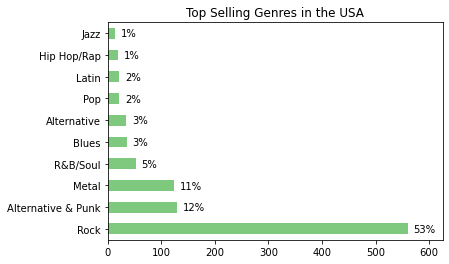

In [3]:
genre_sales_usa = run_query(albums_to_purchase)
genre_sales_usa.set_index("genre", inplace=True, drop=True)

genre_sales_usa["tracks_sold"].plot.barh(
    title="Top Selling Genres in the USA",
    xlim=(0, 625),
    colormap=plt.cm.Accent
)

plt.ylabel('')

for i, label in enumerate(list(genre_sales_usa.index)):
    score = genre_sales_usa.loc[label, "tracks_sold"]
    label = (genre_sales_usa.loc[label, "percentage_sold"] * 100
            ).astype(int).astype(str) + "%"
    plt.annotate(str(label), (score + 10, i - 0.15))

plt.show()

In [4]:
employee_sales_performance = '''
WITH customer_support_rep_sales AS
    (
     SELECT
         i.customer_id,
         c.support_rep_id,
         SUM(i.total) total
     FROM invoice i
     INNER JOIN customer c ON i.customer_id = c.customer_id
     GROUP BY 1,2
    )

SELECT
    e.first_name || " " || e.last_name employee,
    e.hire_date,
    SUM(csrs.total) total_sales
FROM customer_support_rep_sales csrs
INNER JOIN employee e ON e.employee_id = csrs.support_rep_id
GROUP BY 1;
'''

run_query(employee_sales_performance)

,employee,hire_date,total_sales
0,Jane Peacock,2017-04-01 00:00:00,1731.51
1,Margaret Park,2017-05-03 00:00:00,1584.00
2,Steve Johnson,2017-10-17 00:00:00,1393.92


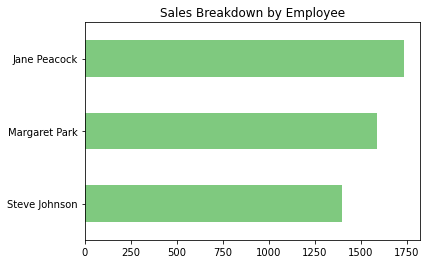

In [5]:
employee_sales = run_query(employee_sales_performance)

employee_sales.set_index("employee", drop=True, inplace=True)
employee_sales.sort_values("total_sales", inplace=True)
employee_sales.plot.barh(
    legend=False,
    title='Sales Breakdown by Employee',
    colormap=plt.cm.Accent
)
plt.ylabel('')
plt.show()

In [6]:
sales_by_country = '''
WITH country_or_other AS
    (
     SELECT
       CASE
           WHEN (
                 SELECT count(*)
                 FROM customer
                 where country = c.country
                ) = 1 THEN "Other"
           ELSE c.country
       END AS country,
       c.customer_id,
       il.*
     FROM invoice_line il
     INNER JOIN invoice i ON i.invoice_id = il.invoice_id
     INNER JOIN customer c ON c.customer_id = i.customer_id
    )

SELECT
    country,
    customers,
    total_sales,
    average_order,
    customer_lifetime_value
FROM
    (
    SELECT
        country,
        count(distinct customer_id) customers,
        SUM(unit_price) total_sales,
        SUM(unit_price) / count(distinct customer_id) customer_lifetime_value,
        SUM(unit_price) / count(distinct invoice_id) average_order,
        CASE
            WHEN country = "Other" THEN 1
            ELSE 0
        END AS sort
    FROM country_or_other
    GROUP BY country
    ORDER BY sort ASC, total_sales DESC
    );
'''

run_query(sales_by_country)

,country,customers,total_sales,average_order,customer_lifetime_value
0,USA,13,1040.49,7.942672,80.037692
1,Canada,8,535.59,7.047237,66.948750
2,Brazil,5,427.68,7.011148,85.536000
3,France,5,389.07,7.781400,77.814000
4,Germany,4,334.62,8.161463,83.655000
5,Czech Republic,2,273.24,9.108000,136.620000
6,United Kingdom,3,245.52,8.768571,81.840000
7,Portugal,2,185.13,6.383793,92.565000
8,India,2,183.15,8.721429,91.575000
9,Other,15,1094.94,7.448571,72.996000


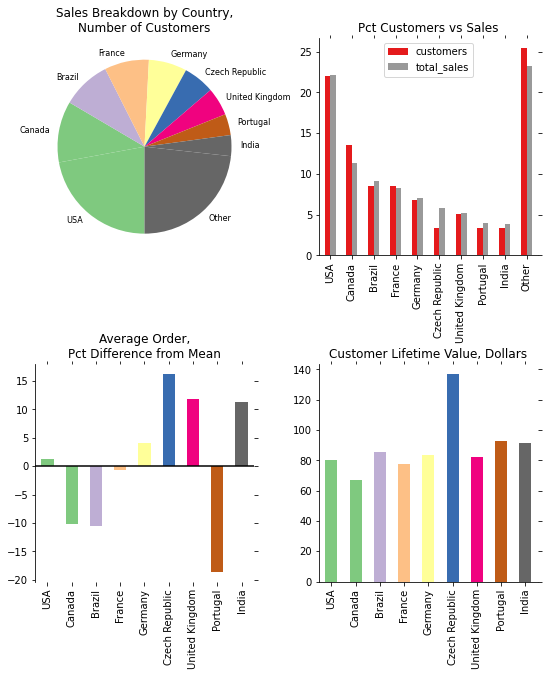

In [7]:
country_metrics = run_query(sales_by_country)
country_metrics.set_index("country", drop=True, inplace=True)
colors = [plt.cm.Accent(i) for i in np.linspace(0, 1, country_metrics.shape[0])]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 10))
ax1, ax2, ax3, ax4 = axes.flatten()
fig.subplots_adjust(hspace=.5, wspace=.3)


# top left
sales_breakdown = country_metrics["total_sales"].copy().rename('')
sales_breakdown.plot.pie(
    ax=ax1,
    startangle=-90,
    counterclock=False,
    title='Sales Breakdown by Country,\nNumber of Customers',
    colormap=plt.cm.Accent,
    fontsize=8,
    wedgeprops={'linewidth':0}
    
)

# top right
cvd_cols = ["customers","total_sales"]
custs_vs_dollars = country_metrics[cvd_cols].copy()
custs_vs_dollars.index.name = ''
for c in cvd_cols:
    custs_vs_dollars[c] /= custs_vs_dollars[c].sum() / 100
custs_vs_dollars.plot.bar(
    ax=ax2,
    colormap=plt.cm.Set1,
    title="Pct Customers vs Sales"
)
ax2.tick_params(top="off", right="off", left="off", bottom="off")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)


# bottom left
avg_order = country_metrics["average_order"].copy()
avg_order.index.name = ''
difference_from_avg = avg_order * 100 / avg_order.mean() - 100
difference_from_avg.drop("Other", inplace=True)
difference_from_avg.plot.bar(
    ax=ax3,
    color=colors,
    title="Average Order,\nPct Difference from Mean"
)
ax3.tick_params(top="off", right="off", left="off", bottom="off")
ax3.axhline(0, color='k')
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.spines["bottom"].set_visible(False)

# bottom right
ltv = country_metrics["customer_lifetime_value"].copy()
ltv.index.name = ''
ltv.drop("Other",inplace=True)
ltv.plot.bar(
    ax=ax4,
    color=colors,
    title="Customer Lifetime Value, Dollars"
)
ax4.tick_params(top="off", right="off", left="off", bottom="off")
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)

plt.show()

In [8]:

albums_vs_tracks = '''
WITH invoice_first_track AS
    (
     SELECT
         il.invoice_id invoice_id,
         MIN(il.track_id) first_track_id
     FROM invoice_line il
     GROUP BY 1
    )

SELECT
    album_purchase,
    COUNT(invoice_id) number_of_invoices,
    CAST(count(invoice_id) AS FLOAT) / (
                                         SELECT COUNT(*) FROM invoice
                                      ) percent
FROM
    (
    SELECT
        ifs.*,
        CASE
            WHEN
                 (
                  SELECT t.track_id FROM track t
                  WHERE t.album_id = (
                                      SELECT t2.album_id FROM track t2
                                      WHERE t2.track_id = ifs.first_track_id
                                     ) 

                  EXCEPT 

                  SELECT il2.track_id FROM invoice_line il2
                  WHERE il2.invoice_id = ifs.invoice_id
                 ) IS NULL
             AND
                 (
                  SELECT il2.track_id FROM invoice_line il2
                  WHERE il2.invoice_id = ifs.invoice_id

                  EXCEPT 

                  SELECT t.track_id FROM track t
                  WHERE t.album_id = (
                                      SELECT t2.album_id FROM track t2
                                      WHERE t2.track_id = ifs.first_track_id
                                     ) 
                 ) IS NULL
             THEN "yes"
             ELSE "no"
         END AS "album_purchase"
     FROM invoice_first_track ifs
    )
GROUP BY album_purchase;
'''

run_query(albums_vs_tracks)

,album_purchase,number_of_invoices,percent
0,no,500,0.814332
1,yes,114,0.185668
